## Model predicts the type of a pokemon based on its appearence

(this is basically my cnn exercise but the model doesn't use convolutional layers)

As input i will use the image of a pokemon. As output we will get a pokemon type

### Import Dependencies

In [1]:
import sys
import tensorflow as tf
import numpy as np
import PIL

from PIL import Image   
import matplotlib.pyplot as plt
import os
import re
import shutil
import string

print(f'python: {sys.version[0:7]}')  # 3.10.12
print(tf.__version__)  # 2.13.0
print(np.__version__)  # 1.24.3
print(PIL.__version__)  # 10.1.0

python: 3.10.12
2.13.0
1.24.3
10.1.0


# Load Data

we need to load 2 datasets
- pokemon types
- pokemon images

pokemon_types but as label

In [2]:
def pokemon_type_to_label(type):
    if type[0] == 'Grass':
        return 0
    elif type[0] == 'Fire':
        return 1
    elif type[0] == 'Water':
        return 2
    elif type[0] == 'Electric':
        return 3
    elif type[0] == 'Ice':
        return 4
    elif type[0] == 'Fighting':
        return 5
    elif type[0] == 'Poison':
        return 6
    elif type[0] == 'Ground':
        return 7
    elif type[0] == 'Flying':
        return 8
    elif type[0] == 'Psychic':
        return 9
    elif type[0] == 'Bug':
        return 10
    elif type[0] == 'Rock':
        return 11
    elif type[0] == 'Ghost':
        return 12
    elif type[0] == 'Steel':
        return 13
    elif type[0] == 'Dragon':
        return 14
    elif type[0] == 'Dark':
        return 15
    elif type[0] == 'Fairy':
        return 16
    elif type[0] == 'Normal':
        return 17
    else:
        'ERROR'


types = ['Grass', 'Fire', 'Water', 'Electric', 'Ice', 'Fighting', 'Poison', 'Ground',
         'Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Steel', 'Dragon', 'Dark', 'Fairy', 'Normal']

only primary types because that was easier

In [3]:
import csv

pokemon_primary_types = []
with open('./pokemon_data/pokemon_Type1.csv', newline='') as type1:
    type1_reader = csv.reader(type1, delimiter=' ', quotechar='|')
    for t1 in type1_reader:
        t1 = pokemon_type_to_label(t1)
        pokemon_primary_types.append(t1)
print(len(pokemon_primary_types))
print(pokemon_primary_types[0])  # print first entry

809
0


pokemon images

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
SIZE = (120, 120)

pokemon_images = []
directory = "./pokemon_data/images/"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = load_img(f, target_size=SIZE)
    image = img_to_array(image)
    image = image / 255.0
    # image = Image.open(f)
    pokemon_images.append(image)
print(len(pokemon_images))

c:\Users\kaan-\anaconda3\envs\tf213\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


809


# Preprocessing Data

also my pokemon types aren't mnumpy arrays yet

In [5]:
pokemon_primary_types = np.array(pokemon_primary_types)


formatting the labels differently so that the neural network can make predictions

In [10]:
from tensorflow.keras.utils import to_categorical

one_hot_labels = to_categorical(pokemon_primary_types, num_classes=len(types))


Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    pokemon_images, one_hot_labels, test_size=0.2, random_state=69)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Before we start, let's get a few things clear
- I am trying 4 models with different dropout layers (0.5, 0.3, 0.1, 0.0)
- Everything is trained with the same model structure
- 20 epochs each
- 32 batch size each
- Every model is getting the same train and test set

<div style='text-align:center;font-size:70px;background-color:black;color:white;border-style:solid;border-color:cyan;padding-top:5px;padding-bottom:15px;'>
-- Dropout 0.5 --
</div>

### Create Model (Dropout 0.5)

In [12]:
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input, Dropout
from tensorflow.keras import layers
from tensorflow import keras

model = keras.Sequential([
    layers.Dense(32, input_shape=(120, 120, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(types), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train Model (Dropout 0.5)

In [13]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
21/21 [==============================] - 39s 2s/step - loss: 78.0417 - accuracy: 0.0757
Epoch 2/20
21/21 [==============================] - 38s 2s/step - loss: 40.2988 - accuracy: 0.0896
Epoch 3/20
21/21 [==============================] - 38s 2s/step - loss: 22.5969 - accuracy: 0.0819
Epoch 4/20
21/21 [==============================] - 37s 2s/step - loss: 8.5566 - accuracy: 0.1097
Epoch 5/20
21/21 [==============================] - 37s 2s/step - loss: 2.8994 - accuracy: 0.1314
Epoch 6/20
21/21 [==============================] - 37s 2s/step - loss: 2.8400 - accuracy: 0.1577
Epoch 7/20
21/21 [==============================] - 37s 2s/step - loss: 2.7973 - accuracy: 0.1453
Epoch 8/20
21/21 [==============================] - 37s 2s/step - loss: 2.7560 - accuracy: 0.1453
Epoch 9/20
21/21 [==============================] - 38s 2s/step - loss: 2.7358 - accuracy: 0.1607
Epoch 10/20
21/21 [==============================] - 38s 2s/step - loss: 2.7480 - accuracy: 0.1700
Epoch 11/20
21/2

### Test Model (Dropout 0.5)

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

6/6 [==============================] - 1s 100ms/step - loss: 2.7339 - accuracy: 0.1605
Test Loss: 2.7339298725128174, Test Accuracy: 0.16049382090568542


### Evaluating the results (Dropout 0.5)

6/6 [==============================] - 1s 102ms/step


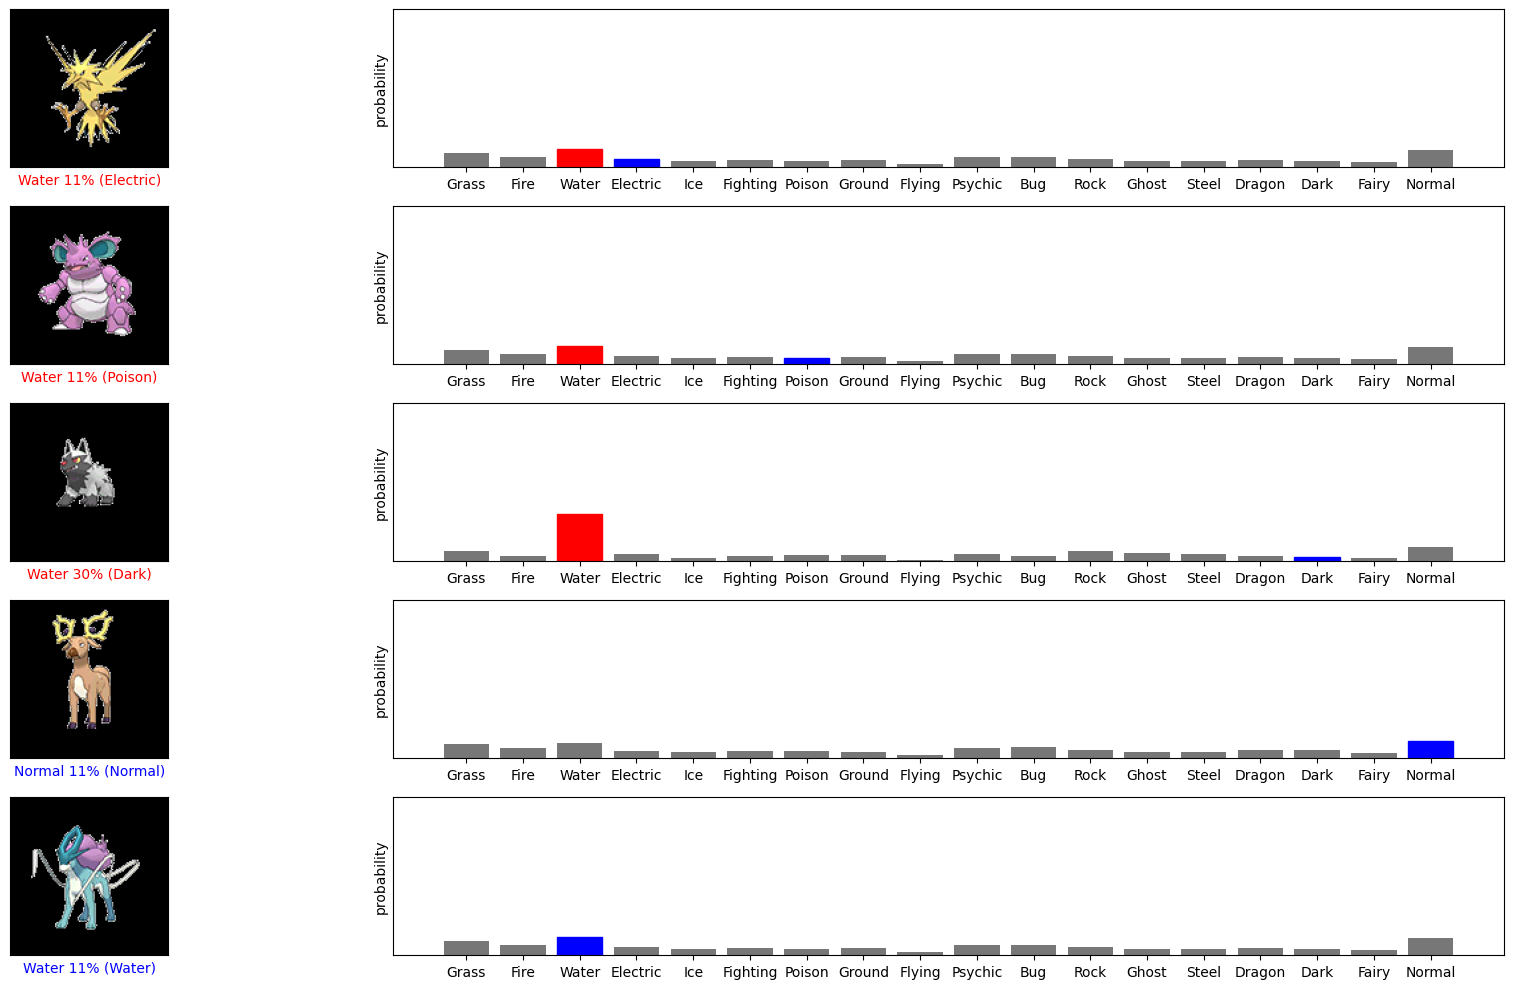

In [50]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(types[predicted_label],
                                       100*np.max(predictions_array),
                                       types[true_label]),
             color=color)


def plot_value_array2(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(len(types)))
  plt.yticks([])
  thisplot = plt.bar(types, predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  true_label = np.argmax(true_label)
  thisplot[true_label].set_color('blue')
  ax = plt.gca()
  ax.set_ylabel('probability')



predictions = model.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5  # 5
num_cols = 1  # 3
num_images = num_rows*num_cols
plt.figure(figsize=(5*4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array2(i, predictions[i], y_test)

plt.tight_layout()

plt.show()

<div style='text-align:center;font-size:70px;background-color:black;color:white;border-style:solid;border-color:cyan;padding-top:5px;padding-bottom:15px;'>
-- Dropout 0.3 --
</div>

### Create Model (Dropout 0.3)

In [16]:
model2 = keras.Sequential([
    layers.Dense(32, input_shape=(120, 120, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(types), activation='softmax')
])

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train Model (Dropout 0.3)

In [17]:
model2.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
21/21 [==============================] - 42s 2s/step - loss: 37.9909 - accuracy: 0.0819
Epoch 2/20
21/21 [==============================] - 39s 2s/step - loss: 17.4642 - accuracy: 0.1406
Epoch 3/20
21/21 [==============================] - 40s 2s/step - loss: 6.6732 - accuracy: 0.1638
Epoch 4/20
21/21 [==============================] - 40s 2s/step - loss: 3.0271 - accuracy: 0.1808
Epoch 5/20
21/21 [==============================] - 41s 2s/step - loss: 2.5793 - accuracy: 0.1994
Epoch 6/20
21/21 [==============================] - 41s 2s/step - loss: 2.6636 - accuracy: 0.2195
Epoch 7/20
21/21 [==============================] - 41s 2s/step - loss: 2.4945 - accuracy: 0.2566
Epoch 8/20
21/21 [==============================] - 40s 2s/step - loss: 2.4188 - accuracy: 0.2705
Epoch 9/20
21/21 [==============================] - 40s 2s/step - loss: 2.3941 - accuracy: 0.2751
Epoch 10/20
21/21 [==============================] - 41s 2s/step - loss: 2.2666 - accuracy: 0.2906
Epoch 11/20
21/21

### Test Model (Dropout 0.3)

In [18]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

6/6 [==============================] - 1s 104ms/step - loss: 2.8755 - accuracy: 0.1790
Test Loss: 2.875500440597534, Test Accuracy: 0.17901234328746796


### Evaluate Results (Dropout 0.3)

6/6 [==============================] - 2s 112ms/step - loss: 2.8755 - accuracy: 0.1790
Test Loss: 2.875500440597534, Test Accuracy: 0.17901234328746796
6/6 [==============================] - 1s 107ms/step


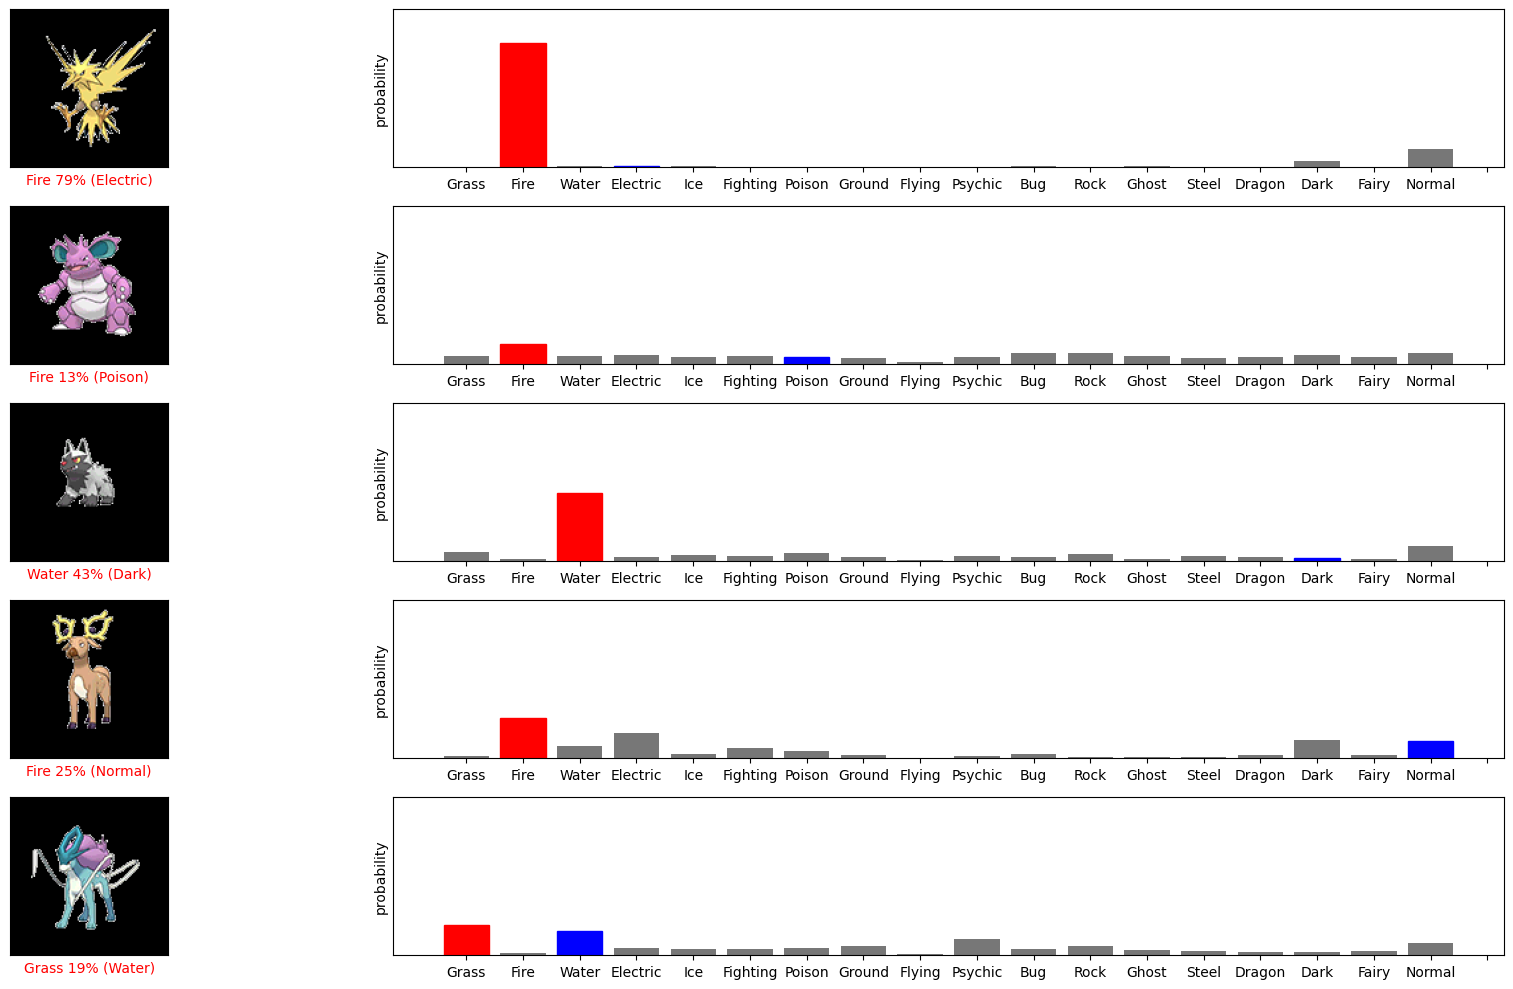

In [28]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

predictions = model2.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5  # 5
num_cols = 1  # 3
num_images = num_rows*num_cols
plt.figure(figsize=(5*4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array2(i, predictions[i], y_test)

plt.tight_layout()

plt.show()

<div style='text-align:center;font-size:70px;background-color:black;color:white;border-style:solid;border-color:cyan;padding-top:5px;padding-bottom:15px;'>
-- Dropout 0.1 --
</div>

### Create Model (Dropout 0.1)

In [20]:
model3 = keras.Sequential([
    layers.Dense(32, input_shape=(120, 120, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(len(types), activation='softmax')
])

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train Model (Dropout 0.1)

In [21]:
model3.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
21/21 [==============================] - 43s 2s/step - loss: 31.0621 - accuracy: 0.0881
Epoch 2/20
21/21 [==============================] - 39s 2s/step - loss: 12.7086 - accuracy: 0.1406
Epoch 3/20
21/21 [==============================] - 39s 2s/step - loss: 7.2881 - accuracy: 0.2473
Epoch 4/20
21/21 [==============================] - 39s 2s/step - loss: 4.3235 - accuracy: 0.3153
Epoch 5/20
21/21 [==============================] - 39s 2s/step - loss: 3.2733 - accuracy: 0.4266
Epoch 6/20
21/21 [==============================] - 39s 2s/step - loss: 1.7682 - accuracy: 0.4683
Epoch 7/20
21/21 [==============================] - 39s 2s/step - loss: 1.4221 - accuracy: 0.5456
Epoch 8/20
21/21 [==============================] - 39s 2s/step - loss: 1.2217 - accuracy: 0.6182
Epoch 9/20
21/21 [==============================] - 39s 2s/step - loss: 1.1905 - accuracy: 0.6662
Epoch 10/20
21/21 [==============================] - 39s 2s/step - loss: 0.8685 - accuracy: 0.7481
Epoch 11/20
21/21

### Test Model (Dropout 0.1)

In [22]:
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

6/6 [==============================] - 1s 105ms/step - loss: 4.2733 - accuracy: 0.1790
Test Loss: 4.273344993591309, Test Accuracy: 0.17901234328746796


### Evaluate Model (Dropout 0.1)

6/6 [==============================] - 1s 112ms/step - loss: 4.2733 - accuracy: 0.1790
Test Loss: 4.273344993591309, Test Accuracy: 0.17901234328746796
6/6 [==============================] - 1s 108ms/step


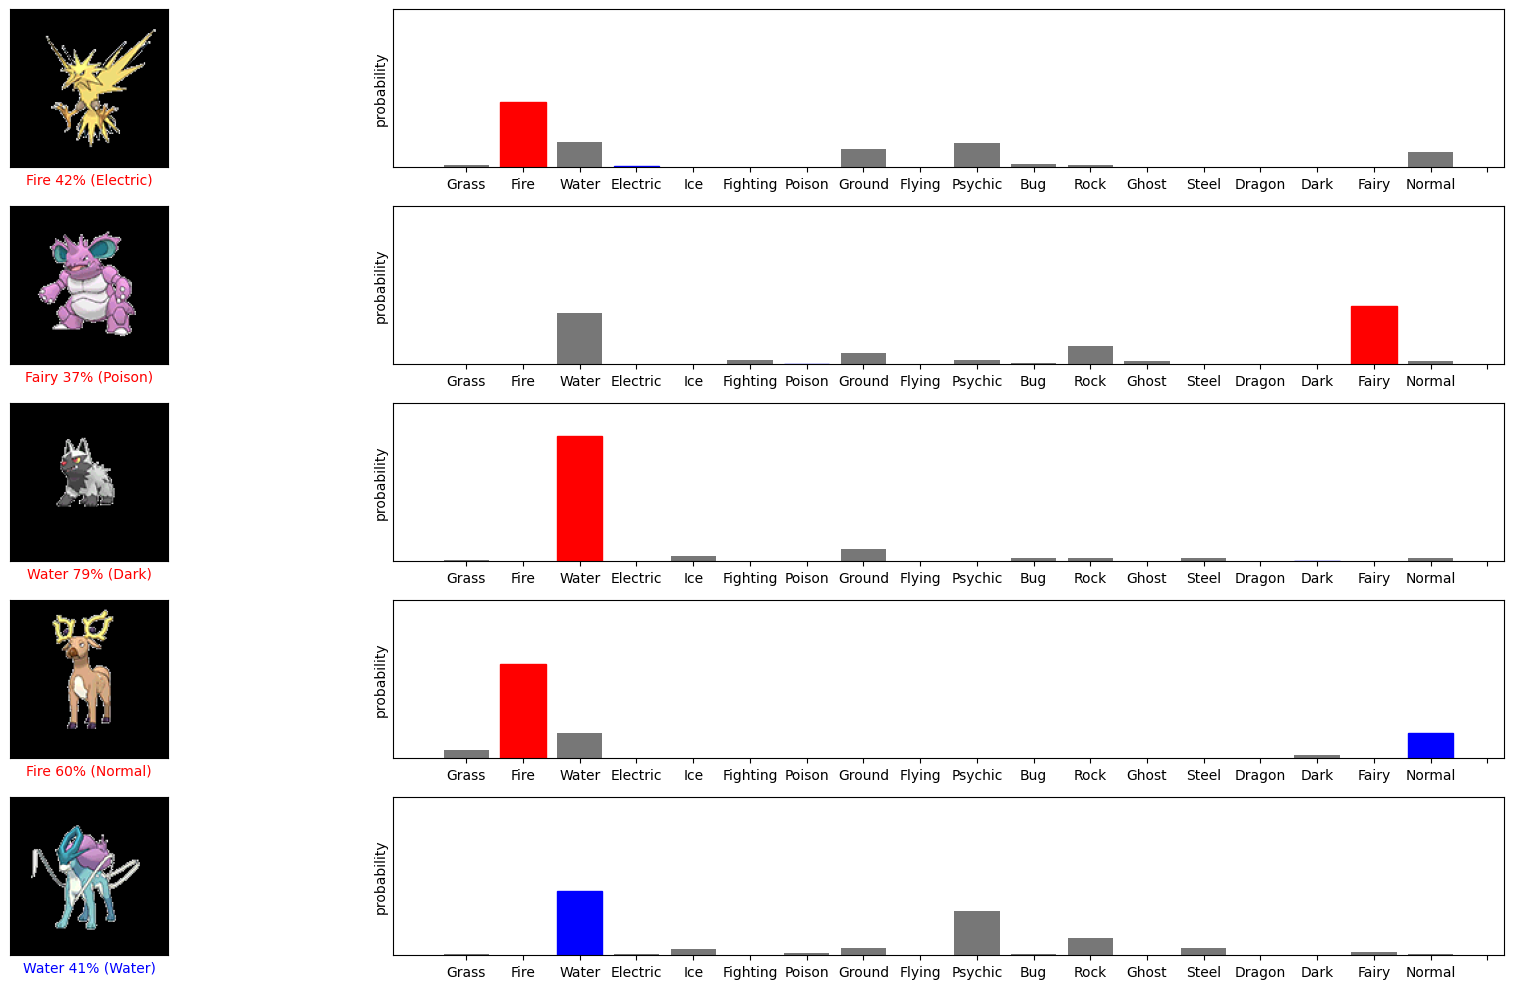

In [30]:
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

predictions = model3.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5  # 5
num_cols = 1  # 3
num_images = num_rows*num_cols
plt.figure(figsize=(5*4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array2(i, predictions[i], y_test)

plt.tight_layout()

plt.show()

<div style='text-align:center;font-size:70px;background-color:black;color:white;border-style:solid;border-color:cyan;padding-top:5px;padding-bottom:15px;'>
-- No Dropout --
</div>

### Create Model (No Dropout)

In [24]:
model4 = keras.Sequential([
    layers.Dense(32, input_shape=(120, 120, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(types), activation='softmax')
])

model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train Model (No Dropout)

In [25]:
model4.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
21/21 [==============================] - 39s 2s/step - loss: 46.3536 - accuracy: 0.1005
Epoch 2/20
21/21 [==============================] - 38s 2s/step - loss: 17.8141 - accuracy: 0.1870
Epoch 3/20
21/21 [==============================] - 40s 2s/step - loss: 7.9880 - accuracy: 0.3493
Epoch 4/20
21/21 [==============================] - 40s 2s/step - loss: 5.7225 - accuracy: 0.4745
Epoch 5/20
21/21 [==============================] - 40s 2s/step - loss: 3.5337 - accuracy: 0.6275
Epoch 6/20
21/21 [==============================] - 41s 2s/step - loss: 1.7311 - accuracy: 0.7357
Epoch 7/20
21/21 [==============================] - 40s 2s/step - loss: 1.1630 - accuracy: 0.8223
Epoch 8/20
21/21 [==============================] - 40s 2s/step - loss: 0.9709 - accuracy: 0.8547
Epoch 9/20
21/21 [==============================] - 38s 2s/step - loss: 0.7614 - accuracy: 0.8964
Epoch 10/20
21/21 [==============================] - 38s 2s/step - loss: 0.5668 - accuracy: 0.9057
Epoch 11/20
21/21

### Test Model (No Dropout)

In [26]:
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

6/6 [==============================] - 1s 110ms/step - loss: 3.7284 - accuracy: 0.1975
Test Loss: 3.728374719619751, Test Accuracy: 0.1975308656692505


### Evaluate Results (No Dropout)

6/6 [==============================] - 1s 105ms/step - loss: 3.7284 - accuracy: 0.1975
Test Loss: 3.728374719619751, Test Accuracy: 0.1975308656692505
6/6 [==============================] - 1s 105ms/step


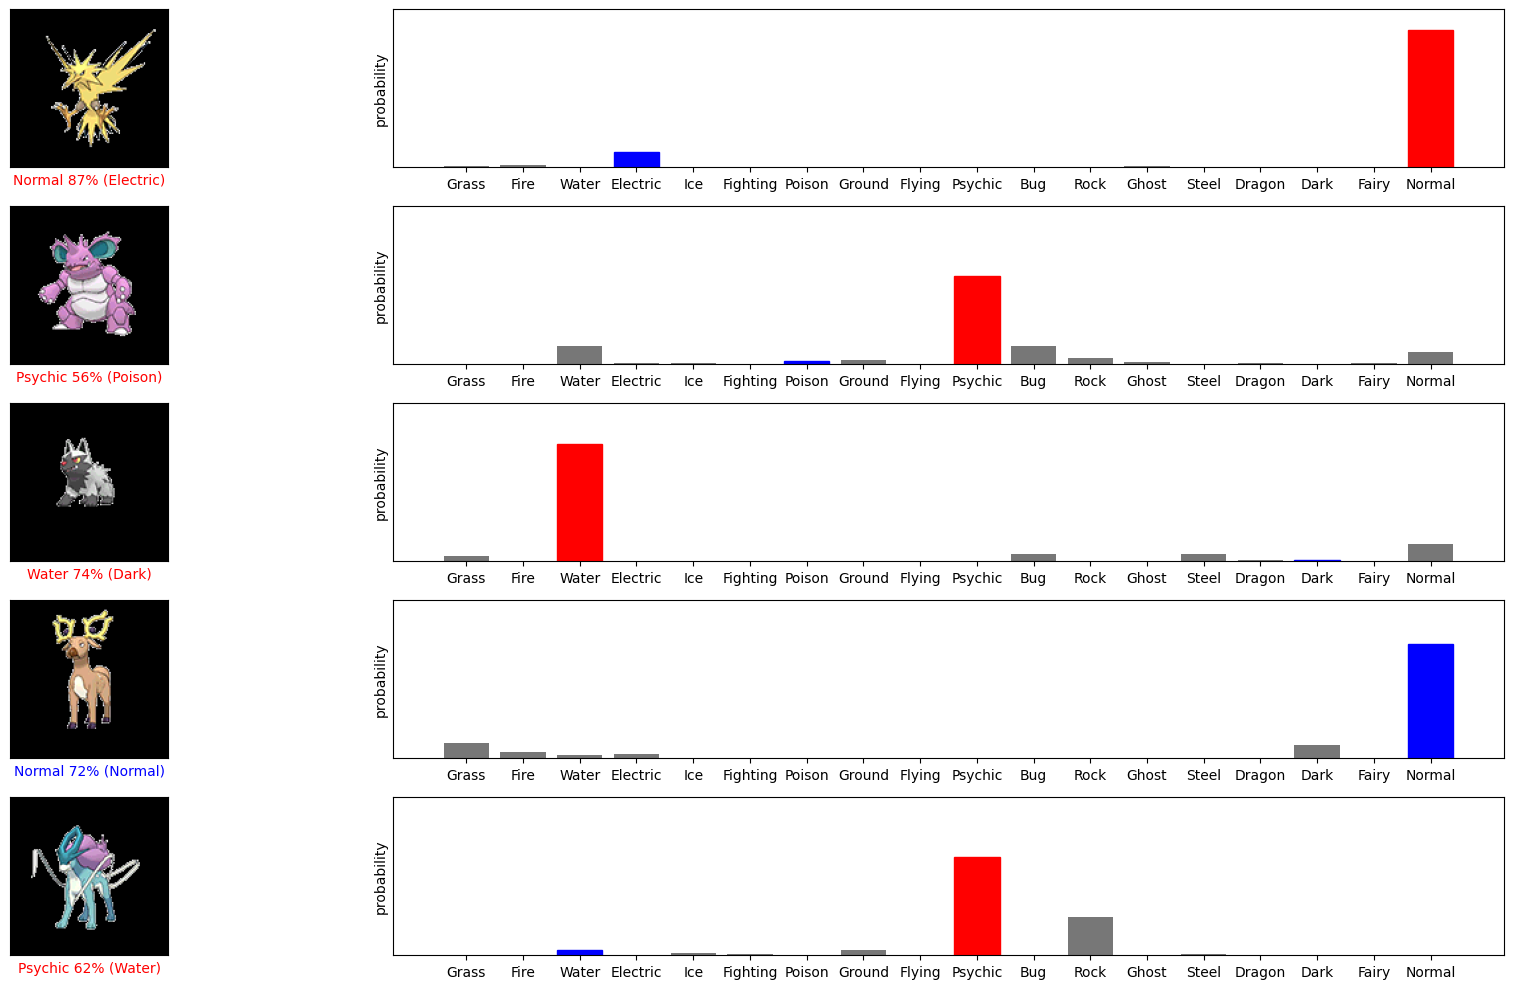

In [51]:
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

predictions = model4.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5  # 5
num_cols = 1  # 3
num_images = num_rows*num_cols
plt.figure(figsize=(5*4*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array2(i, predictions[i], y_test)

plt.tight_layout()

plt.show()

<div style='text-align:center;font-size:70px;background-color:black;color:white;border-style:solid;border-color:cyan;padding-top:5px;padding-bottom:15px;'>
-- Combined Results --
</div>

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, y_test) # 0.5
print(f'Test Accuracy (0.5): {test_accuracy}')
test_loss, test_accuracy = model2.evaluate(X_test, y_test) # 0.3
print(f'Test Accuracy (0.3): {test_accuracy}')
test_loss, test_accuracy = model3.evaluate(X_test, y_test) # 0.1
print(f'Test Accuracy (0.1): {test_accuracy}')
test_loss, test_accuracy = model4.evaluate(X_test, y_test) # 0.0
print(f'Test Accuracy (0.0): {test_accuracy}')

predictions1 = model.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)
predictions4 = model4.predict(X_test)

6/6 [==============================] - 1s 111ms/step - loss: 2.7339 - accuracy: 0.1605
Test Accuracy (0.5): 0.16049382090568542
6/6 [==============================] - 1s 109ms/step - loss: 2.8755 - accuracy: 0.1790
Test Accuracy (0.3): 0.17901234328746796
6/6 [==============================] - 1s 107ms/step - loss: 4.2733 - accuracy: 0.1790
Test Accuracy (0.1): 0.17901234328746796
6/6 [==============================] - 1s 104ms/step - loss: 3.7284 - accuracy: 0.1975
Test Accuracy (0.0): 0.1975308656692505
6/6 [==============================] - 1s 112ms/step


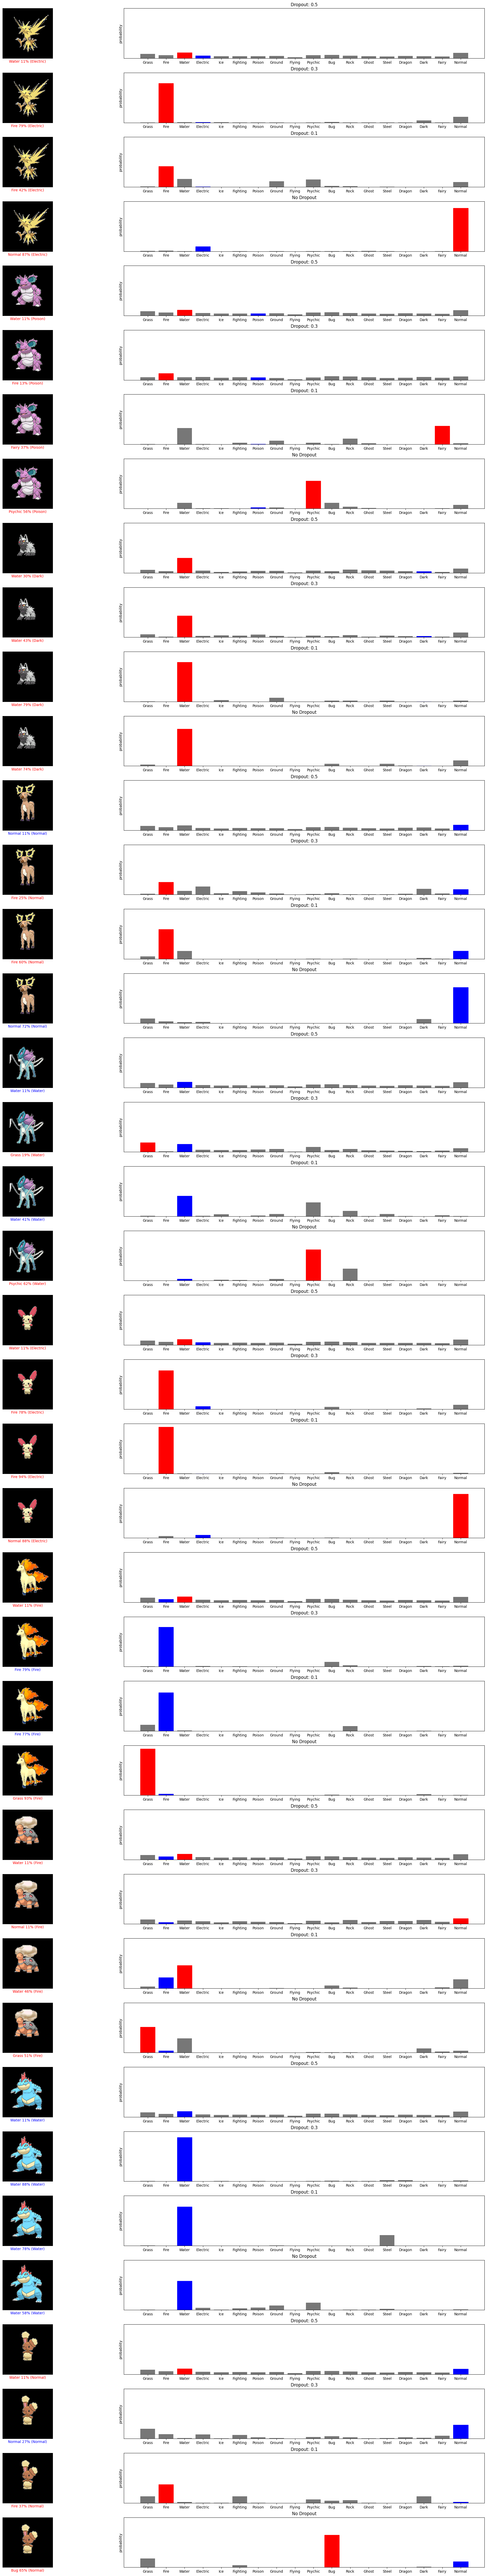

In [84]:
# Plot the first X test images, their predicted labels, and the true labels.  11, 79, 42, 87
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10  # 5
num_cols = 1  # 3
num_images = num_rows*num_cols
num_models = 4
plt.figure(figsize=(5*5*num_cols, 10*num_rows))
for i in range(num_images):
  plt.subplot(num_models*num_rows, 2*num_cols, 8*i+1)
  plot_image(i, predictions1[i], y_test, X_test)
  plt.subplot(num_models*num_rows, 2*num_cols, 8*i+2)
  plot_value_array2(i, predictions1[i], y_test)
  plt.title('Dropout: 0.5')

  plt.subplot(num_models*num_rows, 2*num_cols, 8*i+3)
  plot_image(i, predictions2[i], y_test, X_test)
  plt.subplot(num_models*num_rows, 2*num_cols, 8*i+4)
  plot_value_array2(i, predictions2[i], y_test)
  plt.title('Dropout: 0.3')

  plt.subplot(num_models*num_rows, 2*num_cols, 8*i+5)
  plot_image(i, predictions3[i], y_test, X_test)
  plt.subplot(num_models*num_rows, 2*num_cols, 8*i+6)
  plot_value_array2(i, predictions3[i], y_test)
  plt.title('Dropout: 0.1')

  plt.subplot(num_models*num_rows, 2*num_cols, 8*i+7)
  plot_image(i, predictions4[i], y_test, X_test)
  plt.subplot(num_models*num_rows, 2*num_cols, 8*i+8)
  plot_value_array2(i, predictions4[i], y_test)
  plt.title('No Dropout')

plt.tight_layout(h_pad=0.7)
plt.show()

## Some Conclusions 
- I can say that the 0.5 dropout model is indeed dropping out too much. You can see that because it basically predicts all types.
- from the 0.1 model we can see that it actually starts to hard predict pokemon types, which do make sense if you think about it. Water guy (9/10) does indeed also kinda look like it could be a steel pokemon. the fire turtle (8/10) is literally a turtle so no suprise it guesses water type. the red electric mouse (6/10) kinda resembles a firefly ish thing without wings.
- The 0.3 model is sometimes hard predicting like 0.1 model and sometimes it guesses everything a bit like the 0.5 model.
- the no dropout model goes for harder predictions than the 0.1 model. The Bunny (10/10) does have something away from a bug and grass (and evolves into a figthing type). Fire turtle gets classified as grass which is somewhat understandable. Fire Unicorn gets classified as grass which can also be somewhat understandable. Electric mouse in normal which is understandable (again, normal pokemon can look like almost anything)  


Here are the Accuracies on this specific data split
- Dropout 0.5 model: 0.1605
- Dropout 0.3 model: 0.1790
- Dropout 0.1 model: 0.1790
- No Dropout model: 0.1975